In [12]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from os import path
from wordcloud import WordCloud
import seaborn as sns

df = pd.read_json("result.json")

In [13]:
chat_df = pd.DataFrame(df['messages'].copy())
chat = pd.DataFrame(chat_df.messages.values.tolist())

In [14]:
display(chat)

,id,type,date,actor,actor_id,action,title,text,from,from_id,...,mime_type,duration_seconds,width,height,sticker_emoji,photo,edited,forwarded_from,via_bot,message_id
0,1,service,2020-03-28T12:17:55,Virtual install fest,channel1338119199,migrate_from_group,Virtual install fest,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,message,2020-03-28T12:18:28,NaN,NaN,NaN,NaN,Hola,Claudio Paz,user200010665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,message,2020-03-28T12:18:45,NaN,NaN,NaN,NaN,Paso 0 bajar linux,Claudio Paz,user200010665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,message,2020-03-28T12:19:19,NaN,NaN,NaN,NaN,[Download Ubuntu Desktop | Download | Ubuntu\n...,Claudio Paz,user200010665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,message,2020-03-28T12:20:11,NaN,NaN,NaN,NaN,"Esto es para tener Linux solamente , o tener l...",Ignacio Farias Linares,user1136683268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64051,64500,message,2022-05-06T22:38:20,NaN,NaN,NaN,NaN,Ta durmiendo el dennis,Juan Sanchez Serantes,user1101534072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64052,64501,message,2022-05-06T22:42:30,NaN,NaN,NaN,NaN,"[{'type': 'bot_command', 'text': '/fortune'}]",Claudio Paz,user200010665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64053,64502,message,2022-05-06T22:42:32,NaN,NaN,NaN,NaN,[Mi mujer me dijo: O el MODEM o yo. (A veces l...,DennisRitchieBot,user1148698516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64054,64503,message,2022-05-06T22:53:05,NaN,NaN,NaN,NaN,"[{'type': 'bot_command', 'text': '/fortune'}]",Mariano Vatcoff,user898824282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Message Ranking

In [15]:
chat.columns

Index(['id', 'type', 'date', 'actor', 'actor_id', 'action', 'title', 'text',
       'from', 'from_id', 'reply_to_message_id', 'inviter', 'members', 'file',
       'thumbnail', 'media_type', 'mime_type', 'duration_seconds', 'width',
       'height', 'sticker_emoji', 'photo', 'edited', 'forwarded_from',
       'via_bot', 'message_id'],
      dtype='object')

In [16]:
names = []
messages = []
date = []
for i in range(0,chat.shape[0]):
    try:
        messages.append(chat['text'][i])
        names.append(chat['from'][i])
        date.append(chat['date'][i])
    except:
        pass

In [17]:
print(len(names))
print(len(messages))

64056
64056


In [27]:
removal_list = ['nan']
name_list = [word for word in names if str(word) not in removal_list]

counts = Counter(name_list)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

labels_100 = labels[0:20]
values_100 = values[0:20]
indexes_100 = indexes[0:20]

In [28]:
print(labels_100)
print(values_100)
print(indexes_100)

['Claudio Paz' 'Martin Nievas' 'Alejo Romero' 'Ignacio Farias Linares'
 'Juan Sanchez Serantes' 'Juan Araoz' 'Nahuel Rios' None 'gino deangelli'
 'Andres' 'Mariano Vatcoff' 'Aldana Correa' 'Maxi Moreno'
 'santiago marull' 'Isaac' 'Enrique Philippeaux' 'Franz Pfanner'
 'Eze Cavestri' 'Francisco Javier Díaz Durán' 'Marcos García']
[24341  5936  3045  2643  2372  2312  1468  1430  1402  1246   897   833
   755   606   535   468   449   438   433   432]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


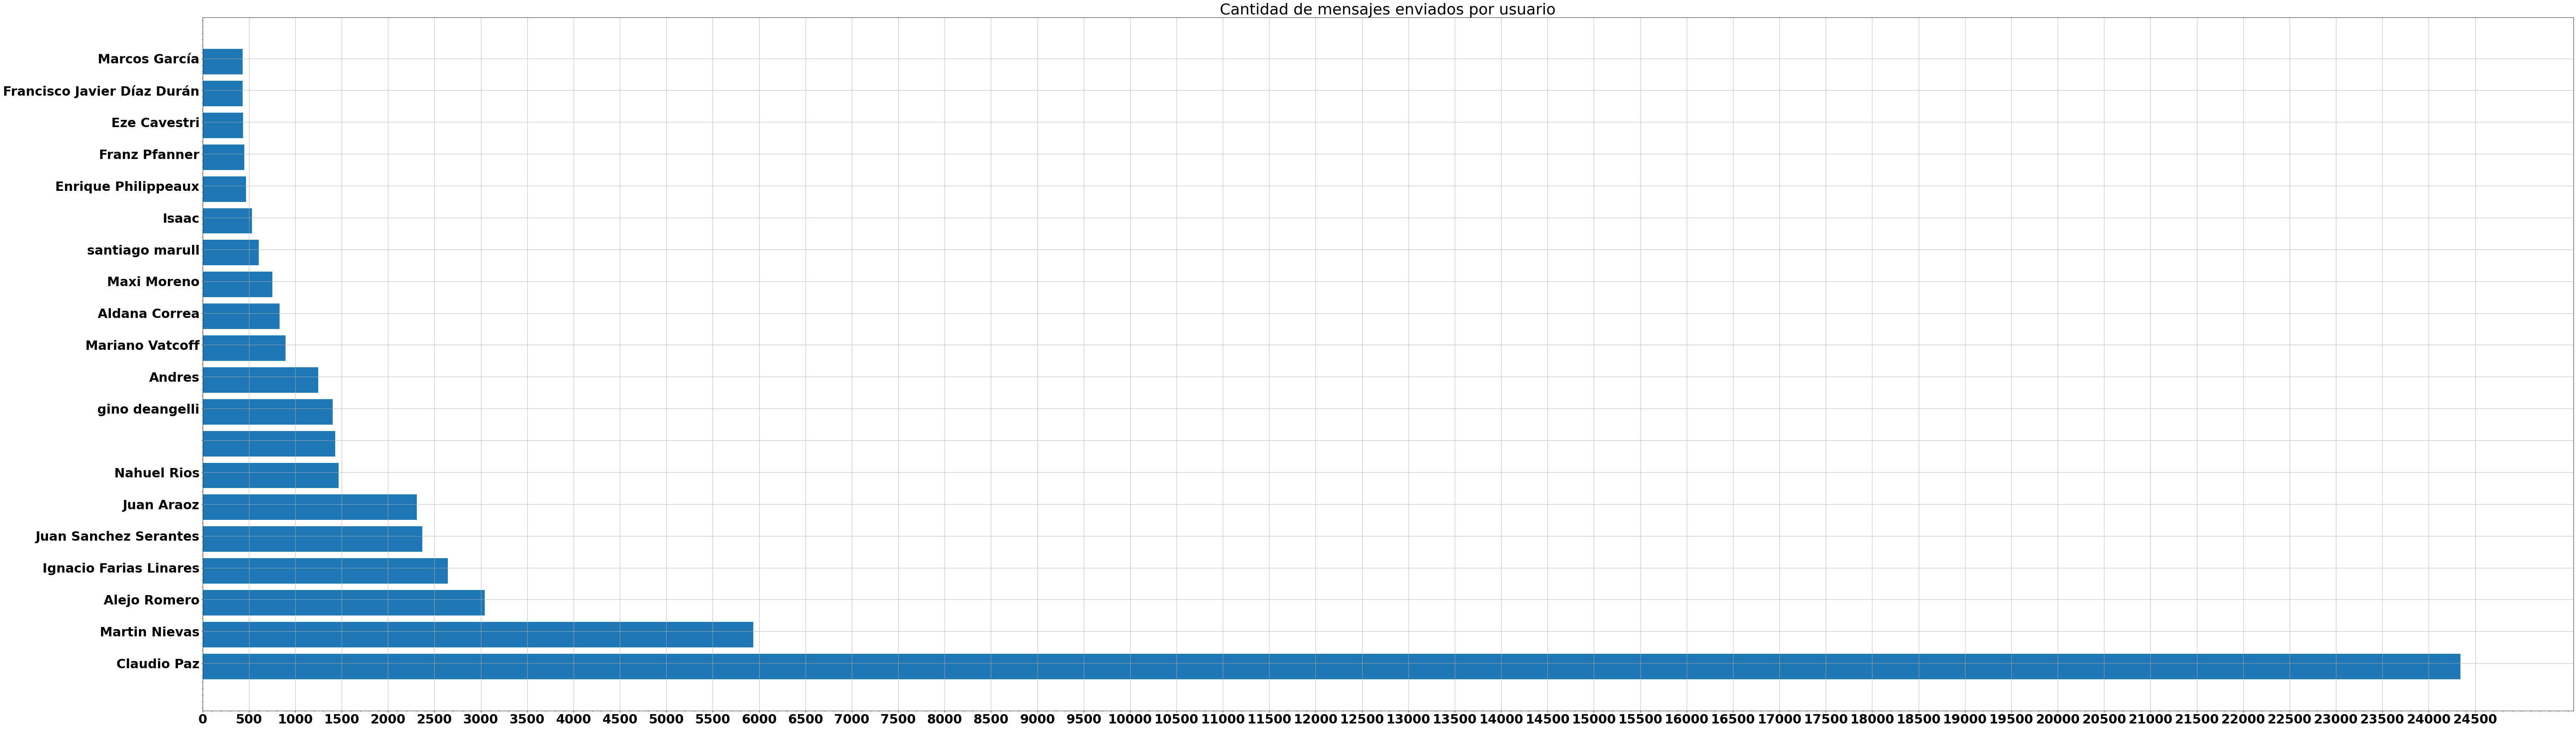

In [34]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}
plt.rc('font', **font)
fig = plt.figure(figsize=(100,30))
bar_width = 0.1

plt.barh(indexes_100, values_100)

# add labels
plt.yticks(indexes_100 + bar_width, labels_100)
#plt.savefig('books_read.pdf')

plt.grid(True)
#plt.xscale('log')
plt.minorticks_on()
plt.xticks(np.arange(0, 25000, 500.0))

#plt.xlabel('Performance')
plt.title('Cantidad de mensajes enviados por usuario')

#plt.xticks(np.arange(min(values), 100, 10.0))
plt.savefig('mensajes.png')
plt.show()


# Most frequent words

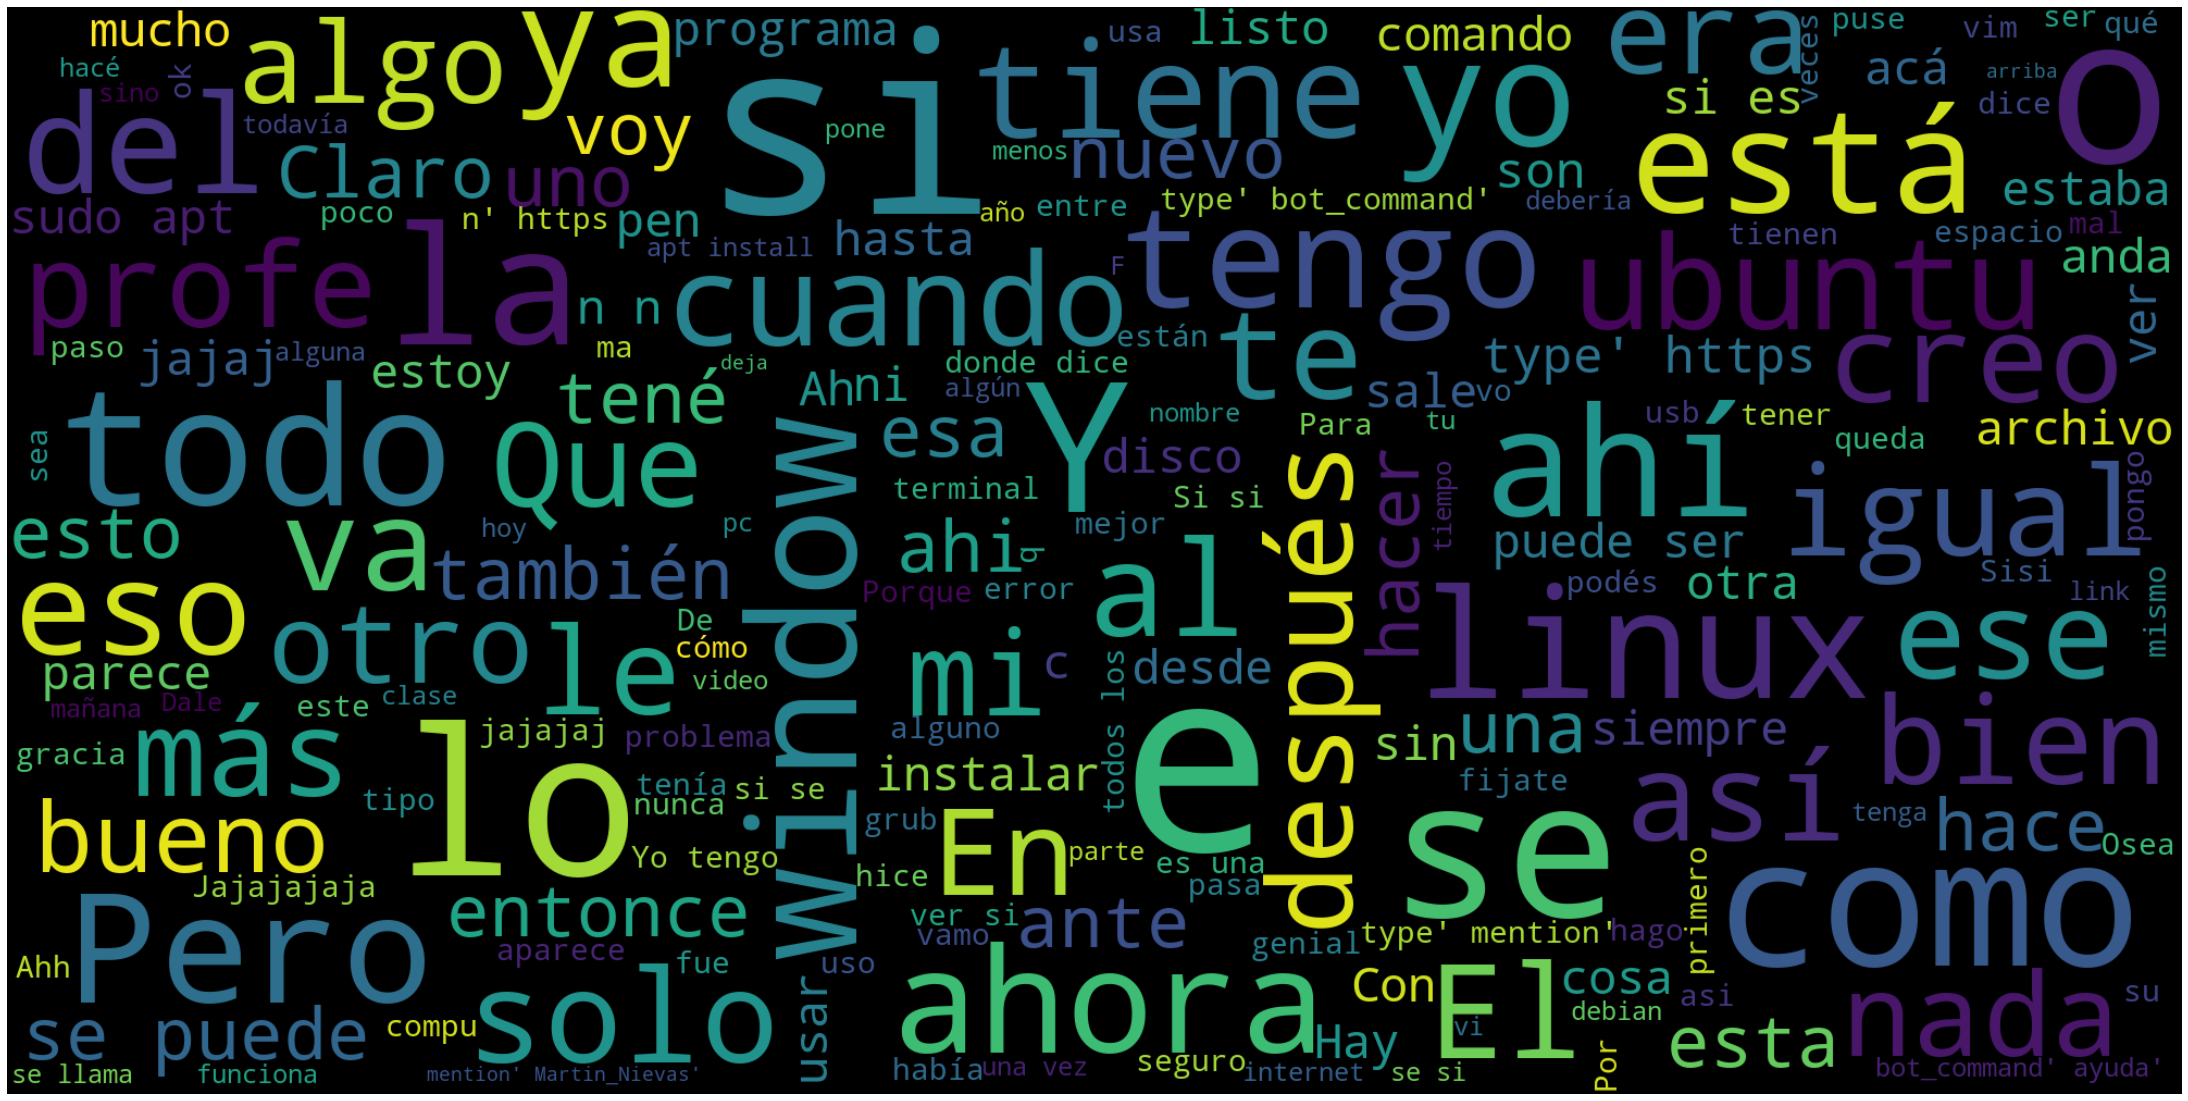

In [45]:

file = open('data.txt', 'w')
for msj in messages:
    file.write(str(msj)+" ")
file.close()

removal_list = ["jajaja", "jaja", "jajajaja","type","Jajaja", "Jaja", "Jajajaja", "linkl", "pero", "con",\
                "y", "eso", "porque", "'link',", "{'type':","'text':","https",
               "lo", "que", "un", "en", "para", "por", "la", "lo", "el", "de", "hay"]


# Read the whole text.
text = open('data.txt').read()
text_split = text.split()

final_list = [word for word in text_split if word not in removal_list]

final_string = ' '.join(final_list)


# lower max_font_size
wordcloud = WordCloud(max_font_size=120,width=1000,height=500,scale=2).generate(final_string)
plt.figure(figsize=(40,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('words_install.png')
plt.show()

In [37]:
print(final_list[0:20])

['Hola', 'Paso', '0', 'bajar', 'linux', "['Download", 'Ubuntu', 'Desktop', '|', 'Download', '|', "Ubuntu\\n',", "'https://ubuntu.com/download/desktop'}]", 'Esto', 'es', 'tener', 'Linux', 'solamente', ',', 'o']
